In [82]:
try:
  import pyvis
except:
  !pip install pyvis -q

In [83]:
import gzip
import re
import itertools
import json
import networkx as nx
import matplotlib.pyplot as plt
import nltk
import string
import networkx as nx
#import pyvis
from pyvis.network import Network
from collections import defaultdict
from itertools import combinations
from textblob import TextBlob

Use tweepy to retrieve the data - please replace with your API keys and uncomment the doc strings

Data is stored at this location

In [84]:
DATA_FILE = "./nikelululemonadidas_tweets.jsonl.gz"

**Review a small sample of the data**

In [85]:
LIMIT = 50

with gzip.open(DATA_FILE) as data_file:
    for i, line in enumerate(data_file):
        tweet = json.loads(line)
        
# Inspect LIMIT number of Tweets that mention Nike
        if i >= LIMIT:
            break
        #tweet = json.loads(line)
        text = tweet.get("full_text") or tweet.get("text")
        if "nike" in text.lower():
            print(text)
        

#ad The Nike Women's Air More Uptempo 96 'White/Opti Yellow' is now available via @footlocker! |$160| #SneakerScouts @Nike https://t.co/5lAq7b2ffU https://t.co/wmjxIcsheP
Proof @LaserShip is stealing. I work from home and have a ring doorbell. @wsoctv @Nike @wcnc @wbtv @bbb_us https://t.co/9o3stezjgs
RT @pyleaks: *LEAK ALERT*: The next Supreme x @Nike collab for Spring 2022 will feature the Nike Shox Ride 2.
The duo will be dropping 3 co…
RT @SneakerScouts: #ad The Space Jam x Nike LeBron 18 Low 'Sylvester vs. Tweety' is now available via @snipes_usa! |$160| #SneakerScouts @K…
Via Nike⁠ SNKRS: can I get a W ⁦@Nike⁩ ⁦@nikebasketball⁩ #snkrs  https://t.co/lQ6zKN1Oq6
SELENA boosted up Puma stocks by 40% 
Her partnership helped Puma grow faster
 than rivals @Adidas &amp; @Nike https://t.co/uRKsuz32lj
RT @etnow: We’re happier than ever as @BillieEilish teams up with @Nike to release sustainable Air Jordans. 👟💚

https://t.co/5yvsm4slSB
@JBside13 @Nike @Chiefs That’s sick
@Kaya_Alexander5 @ni

In [86]:
users = {}
data = []
"""
with gzip.open(DATA_FILE) as data_file:
  for i, line in enumerate(data_file):
    if i % 10000 == 0: 
      print("%s tweets processed" % i) # print updates
    tweet = json.loads(line)
    #data.append(tweet)
    user = tweet["user"]
    user_id = user["id"]
    if user_id not in users:
      users[user_id] = {
          "id": user_id,
          "tweet_count": 0,
          "followers_count": user["followers_count"]
          }
      users[user_id]["tweet_count"] += 1
      #print(f"{i} total Tweets processed")
"""


with gzip.open(DATA_FILE) as data_file:
  for i, line in enumerate(data_file):
    if i % 10000 == 0: 
      print("%s tweets processed" % i) # print updates
    tweet = json.loads(line)
    user = tweet["user"]
    user_id = user["id"]
    if user_id not in users:
      users[user_id] = {
          "id": user_id,
          "tweet_count": 0,
          "followers_count": user["followers_count"]
          }
    users[user_id]["tweet_count"] += 1
    #print(f"{i} total Tweets processed")



0 tweets processed
10000 tweets processed
20000 tweets processed
30000 tweets processed
40000 tweets processed
50000 tweets processed
60000 tweets processed
70000 tweets processed
80000 tweets processed
90000 tweets processed
100000 tweets processed
110000 tweets processed
120000 tweets processed
130000 tweets processed
140000 tweets processed
150000 tweets processed
160000 tweets processed
170000 tweets processed


In [87]:
count_Urs = []
for user_id, user_data in users.items():
  count_Urs.append(user_id)
print("User Count: ", len(count_Urs))

User Count:  104772


In [88]:
included_user_ids = []

min_tweet_count = 10
min_followers_count = 100000

for user_id, user in users.items():
    if user["tweet_count"] >= min_tweet_count and \
             user["followers_count"] >= min_followers_count:
        included_user_ids.append(user_id)
    #print (user["tweet_count"]>5)

In [89]:
len(included_user_ids)

17

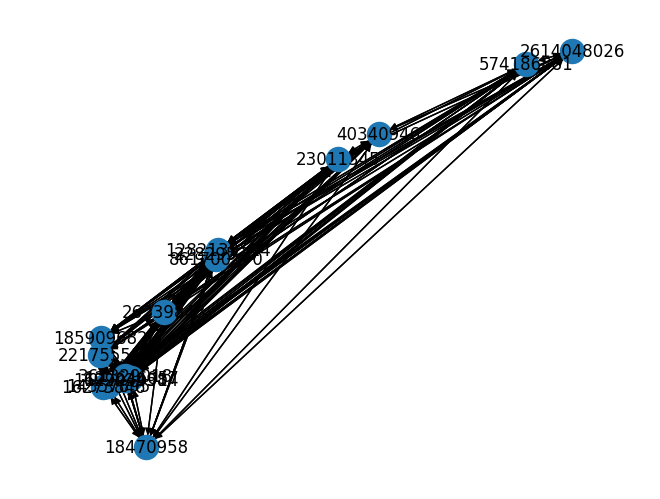

In [90]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for each Twitter user
users_list = included_user_ids
G.add_nodes_from(users_list)

# Add edges between nodes to represent mentions
for source_user in users_list:
    for target_user in users_list:
        if source_user != target_user:
            for brand in users[target_user]:
                if users[target_user][brand] > 0:
                    G.add_edge(source_user, target_user, weight=users[target_user][brand], brand=brand)

# Calculate degree centrality for each node
centrality = nx.degree_centrality(G)
#print(centrality)
nx.draw(G, with_labels=True)

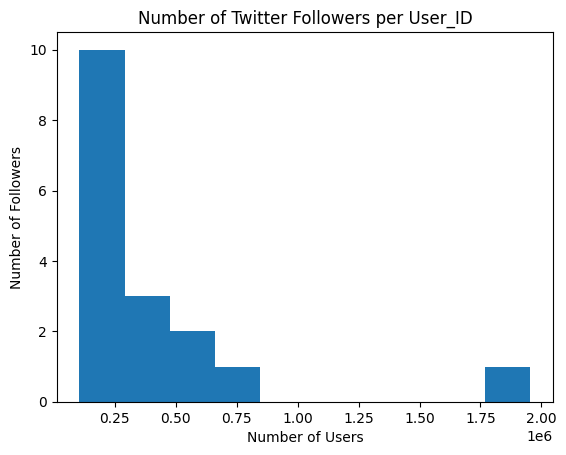

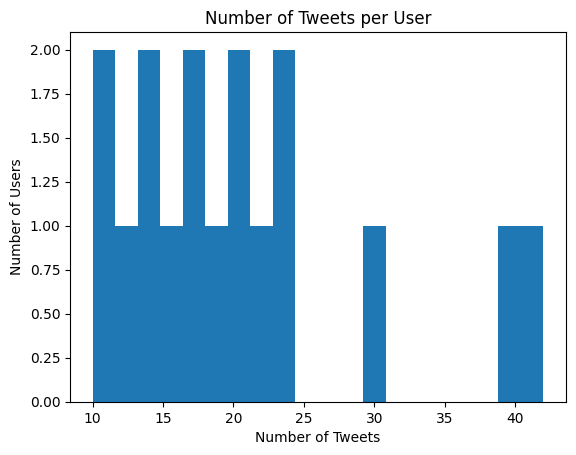

In [91]:
import matplotlib.pyplot as plt

# create two lists to store number of followers and tweet counts
followers_counts = []
tweet_counts = []

# iterate through the included users and append the number of followers and tweet counts to their respective lists
for user_id in included_user_ids:
    followers_counts.append(users[user_id]["followers_count"])
    tweet_counts.append(users[user_id]["tweet_count"])

# plot histogram of followers
plt.hist(followers_counts, bins=10)
plt.title("Number of Twitter Followers per User_ID")
plt.xlabel("Number of Users")
plt.ylabel("Number of Followers")
plt.show()

# plot histogram of tweets
plt.hist(tweet_counts, bins=20)
plt.title("Number of Tweets per User")
plt.xlabel("Number of Tweets")
plt.ylabel("Number of Users")
plt.show()


In [92]:
""" 
from pyvis import network as net
from IPython.core.display import display, HTML
nt = Network(notebook = True, cdn_resources = 'in_line')

nt.from_nx(G)
nt.save_graph("networkx-pyvis.html")
#nt.show('tags.html')
display(HTML(filename="networkx-pyvis.html"))
"""


' \nfrom pyvis import network as net\nfrom IPython.core.display import display, HTML\nnt = Network(notebook = True, cdn_resources = \'in_line\')\n\nnt.from_nx(G)\nnt.save_graph("networkx-pyvis.html")\n#nt.show(\'tags.html\')\ndisplay(HTML(filename="networkx-pyvis.html"))\n'

#Count the words

In [93]:
nltk.download("punkt") #download punct
nltk.download("stopwords") #download stopwords
nltk.download("wordnet") #download wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13033\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13033\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13033\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
#Tokenizer
TWEET_TOKENIZER = nltk.TweetTokenizer().tokenize
WORD_TOKENIZER = nltk.tokenize.word_tokenize

def tokenize(text, lowercase=True, tweet=False):
    """Tokenize the text. By default, also normalizes text to lowercase.
    Optionally uses the Tweet Tokenizer.
    """
    if lowercase:
        text = text.lower()
    if tweet:
        return TWEET_TOKENIZER(text)
    else:
        return WORD_TOKENIZER(text)

In [95]:
#remove morphological affixes
STEMMER = nltk.PorterStemmer()

def stem(tokens):
    """Stem the tokens. I.e., remove morphological affixes and
    normalize to standardized stem forms.

    Has the side effective of producing "unnatural" forms due to
    stemming standards. E.g. quickly becomes quickli
    """
    return [ STEMMER.stem(token) for token in tokens ]

In [96]:
import nltk
nltk.download('omw-1.4')

LEMMATIZER = nltk.WordNetLemmatizer()

def lemmatize(tokens):
    """Lemmatize the tokens.
    
    Retains more natural word forms than stemming, but assumes all
    tokens are nouns unless tokens are passed as (word, pos) tuples.
    """
    lemmas = []
    for token in tokens:
        if isinstance(token, str):
            lemmas.append(LEMMATIZER.lemmatize(token)) # treats token like a noun
        else: # assume a tuple of (word, pos)
            lemmas.append(LEMMATIZER.lemmatize(*token))
    return lemmas

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\13033\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [97]:
def remove_stopwords(tokens, stopwords=None):
    """Remove stopwords, i.e. words that we don't want as part of our
    analysis. Defaults to the default set of nltk english stopwords.
    """
    if stopwords is None:
        stopwords = nltk.corpus.stopwords.words("english")
    return [ token for token in tokens if token not in stopwords ]

In [98]:
def remove_punctuation(tokens,
                       strip_mentions=False,
                       strip_hashtags=False,
                       strict=False):
    """Remove punctuation from a list of tokens.

    Has some specialized options for dealing with Tweets:

    strip_mentions=True will strip the @ off of @ mentions
    strip_hashtags=True will strip the # from hashtags

    strict=True will remove all punctuation from all tokens, not merely
    just tokens that are punctuation per se. 
    """
    tokens = [t for t in tokens if t not in string.punctuation]
    if strip_mentions:
        tokens = [t.lstrip('@') for t in tokens]
    if strip_hashtags:
        tokens = [t.lstrip('#') for t in tokens]
    if strict:
        cleaned = []
        for t in tokens:
            cleaned.append(
                t.translate(str.maketrans('', '', string.punctuation)).strip())
        tokens = [t for t in cleaned if t]
    return tokens

In [99]:
def remove_links(tokens):
    """Removes http/s links from the tokens.

    This simple implementation assumes links have been kept intact as whole
    tokens. E.g. the way the Tweet Tokenizer works.
    """
    return [ t for t in tokens
            if not t.startswith("http://")
            and not t.startswith("https://")
        ]


In [100]:
word_counts = {}

with gzip.open(DATA_FILE) as data_file:
    for i, line in enumerate(data_file):
        if i % 10000 == 0:
            print(f"Processed {i} tweets")
        tweet = json.loads(line)
        text = tweet["full_text"]
        tokens = tokenize(text, tweet=True)
        tokens = remove_links(tokens)
        tokens = remove_stopwords(tokens)
        tokens = remove_punctuation(tokens, strip_mentions=True, strip_hashtags=True)
        tokens = lemmatize(tokens) 
        for word in tokens:
            if word not in word_counts:
                word_counts[word] = 0
            word_counts[word] += 1

Processed 0 tweets
Processed 10000 tweets
Processed 20000 tweets
Processed 30000 tweets
Processed 40000 tweets
Processed 50000 tweets
Processed 60000 tweets
Processed 70000 tweets
Processed 80000 tweets
Processed 90000 tweets
Processed 100000 tweets
Processed 110000 tweets
Processed 120000 tweets
Processed 130000 tweets
Processed 140000 tweets
Processed 150000 tweets
Processed 160000 tweets
Processed 170000 tweets


In [101]:
sorted_counts = sorted(word_counts.items(), key=lambda item: item[1], reverse=True)
sorted_words = [word for word, count in sorted_counts]

In [102]:
len(sorted_words)

87078

In [103]:
print("Nike:", word_counts["nike"])
print("Adidas:", word_counts["adidas"])
print("Lululemon:", word_counts["lululemon"])

Nike: 143755
Adidas: 39206
Lululemon: 6557


In [104]:
brands = ["nike", "adidas", "lululemon"]
brand_counts = {brand: {"count": 0, "users": set()} for brand in brands}


word_counts = {brand: defaultdict(int) for brand in brands}
co_occurrences = {brand: defaultdict(int) for brand in brands}



positive_co_occurrences = {brand: defaultdict(int) for brand in brands}
negative_co_occurrences = {brand: defaultdict(int) for brand in brands}
user_followers = defaultdict(int)


tweet = []
with gzip.open(DATA_FILE) as data_file:
    for i, line in enumerate(data_file):
        if i % 50000 == 0:
            print(f"Processed {i} tweets")
        tweet = json.loads(line)
        user_id = tweet["user"]["id_str"]
        text = tweet["full_text"]
        tokens = tokenize(text, tweet=True)
        tokens = remove_links(tokens)
        tokens = remove_stopwords(tokens)
        tokens = remove_punctuation(tokens, strip_mentions=True, strip_hashtags=True)
        tokens = lemmatize(tokens)
        mentioned_brands = set([word.lower() for word in tokens if word.lower() in brands])
        for brand in mentioned_brands:
            brand_counts[brand]["count"] += 1
            brand_counts[brand]["users"].add(user_id)
        #    
        for word in tokens:
                word_counts[brand][word] += 1
        for pair in combinations(tokens, 2):
                co_occurrences[brand][tuple(sorted(pair))] += 1
        

        


Processed 0 tweets
Processed 50000 tweets
Processed 100000 tweets
Processed 150000 tweets


In [105]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\13033\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13033\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13033\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [106]:
for brand, counts in brand_counts.items():
    print(f"{brand.capitalize()}:")
    print(f"\t{counts['count']} total mentions")
    print(f"\t{len(counts['users'])} unique users mentioned")
    #print(f"\tUsers: {', '.join(counts['users'])}")
    #print(f"\t{(counts['users'])} User Count")

Nike:
	121882 total mentions
	68331 unique users mentioned
Adidas:
	36943 total mentions
	28290 unique users mentioned
Lululemon:
	6187 total mentions
	4461 unique users mentioned


In [107]:
# Create a dictionary of top words for each brand by frequency
top_words = {brand: sorted(word_counts[brand], key=word_counts[brand].get, reverse=True)[:50] for brand in brands}

# Create a graph with each brand as the center
G = nx.Graph()
for brand in brands:
    G.add_node(brand)
    # Add the top words as nodes to the graph
    G.add_nodes_from(top_words[brand])
    # Add edges between the brand and its top words based on co-occurrence frequency
    for word in top_words[brand]:
        G.add_edge(brand, word, weight=word_counts[brand][word])

fig, ax = plt.subplots(figsize=(110, 80.5))
pos = nx.spring_layout(G, k=0.4, iterations=50)

# Draw nodes and edges separately to set node colors and edge widths
node_colors = ["lightblue", "lightgreen", "orange"]
node_size = [1000, 1000, 1000]
for i, brand in enumerate(brands):
    nx.draw_networkx_nodes(G, pos, nodelist=[brand], node_size=node_size[i], node_color=node_colors[i])
nx.draw_networkx_nodes(G, pos, nodelist=top_words["nike"], node_size=500, node_color="lightblue")
nx.draw_networkx_nodes(G, pos, nodelist=top_words["adidas"], node_size=500, node_color="lightgreen")
nx.draw_networkx_nodes(G, pos, nodelist=top_words["lululemon"], node_size=500, node_color="orange")
nx.draw_networkx_edges(G, pos, width=[d["weight"]/2500 for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=50, font_family="sans-serif")

plt.axis("off")
#plt.figure(figsize=(80, 110))
plt.savefig("semantic_network.png")

C:\Users\13033\AppData\Local\Temp\ipykernel_10076\2084945952.py:30: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.savefig("semantic_network.png")
c:\Users\13033\.conda\envs\tf_gpu\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


C:\Users\13033\AppData\Local\Temp\ipykernel_10076\3032673670.py:17: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.savefig("semantic_network.png")


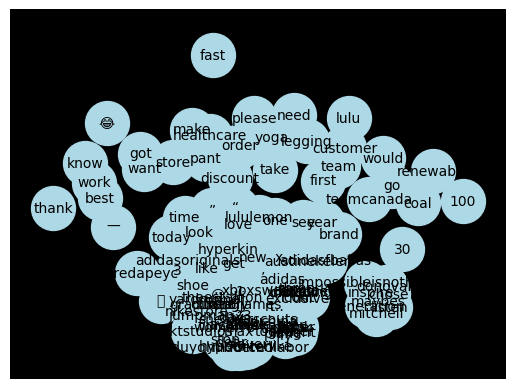

In [108]:
G = nx.Graph()
for brand in brands:
    # Find the top 50 words for each brand by frequency
    top_words = sorted(word_counts[brand], key=word_counts[brand].get, reverse=True)[:50]
    # Add the top words as nodes to the graph
    G.add_nodes_from(top_words)
    # Add edges between the top words based on co-occurrence frequency
    for pair, weight in co_occurrences[brand].items():
        if pair[0] in top_words and pair[1] in top_words:
            G.add_edge(pair[0], pair[1], weight=weight)

pos = nx.spring_layout(G, k=0.4, iterations=50)
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=[d["weight"]/10 for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")
plt.axis("off")
plt.savefig("semantic_network.png")


**Latent Dirichlet Allocation (LDA)**

Identify underlying topics in the tweets using Latent Dirichlet Allocation (LDA)

In [123]:
#import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



# Vectorize the tweets using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweet)

# Perform LDA topic modeling
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))



Topic #0:
contributors in_reply_to_user_id_str id created_at retweeted_status display_text_range possibly_sensitive place lang favorited
Topic #1:
lang full_text place favorited id created_at retweeted_status display_text_range possibly_sensitive in_reply_to_user_id_str
Topic #2:
entities extended_entities user created_at lang in_reply_to_user_id_str truncated full_text id retweeted_status
Topic #3:
in_reply_to_status_id in_reply_to_user_id retweet_count lang in_reply_to_screen_name in_reply_to_user_id_str full_text favorited display_text_range created_at
Topic #4:
geo id_str lang in_reply_to_screen_name truncated full_text favorited in_reply_to_user_id_str id place
Topic #5:
created_at retweeted_status in_reply_to_user_id_str truncated id display_text_range possibly_sensitive place lang favorited
Topic #6:
is_quote_status retweeted in_reply_to_user_id_str full_text id display_text_range in_reply_to_screen_name truncated favorited lang
Topic #7:
favorite_count source in_reply_to_status